In [76]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [77]:
crypto_btc = yf.download(tickers='BTC-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()
crypto_eth = yf.download(tickers='ETH-USD', start='2018-01-01', end='2022-12-31').drop(columns=['Adj Close', 'High', 'Low']).round(2).reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [78]:
crypto_btc['Percent Change'] = crypto_btc['Close'].pct_change()
crypto_eth['Percent Change'] = crypto_eth['Close'].pct_change()

<AxesSubplot:xlabel='Date'>

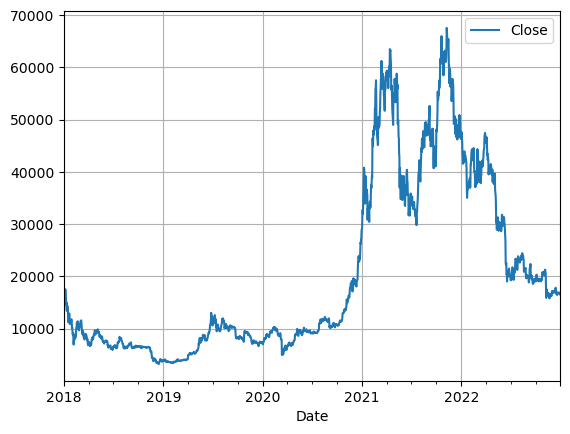

In [79]:
crypto_btc.plot(
    x = 'Date',
    y = 'Close',
    grid = True
)

In [81]:
crypto_btc.head()

,Date,Open,Close,Volume,Percent Change
0,2018-01-01 00:00:00+00:00,14112.2,13657.2,10291200000,NaN
1,2018-01-02 00:00:00+00:00,13625.0,14982.1,16846600192,0.097011
2,2018-01-03 00:00:00+00:00,14978.2,15201.0,16871900160,0.014611
3,2018-01-04 00:00:00+00:00,15270.7,15599.2,21783199744,0.026196
4,2018-01-05 00:00:00+00:00,15477.2,17429.5,23840899072,0.117333


In [82]:
X = crypto_btc[['Open']]
X

,Open
0,14112.20
1,13625.00
2,14978.20
3,15270.70
4,15477.20
...,...
1820,16842.25
1821,16919.29
1822,16716.40
1823,16552.32


In [83]:
y = crypto_btc[['Close']]
y

,Close
0,13657.20
1,14982.10
2,15201.00
3,15599.20
4,17429.50
...,...
1820,16919.80
1821,16717.17
1822,16552.57
1823,16642.34


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


In [85]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge()

In [86]:
kr.fit(X_train, y_train)

KernelRidge()

In [92]:
pred_btc = kr.predict(X)

<AxesSubplot:xlabel='Date'>

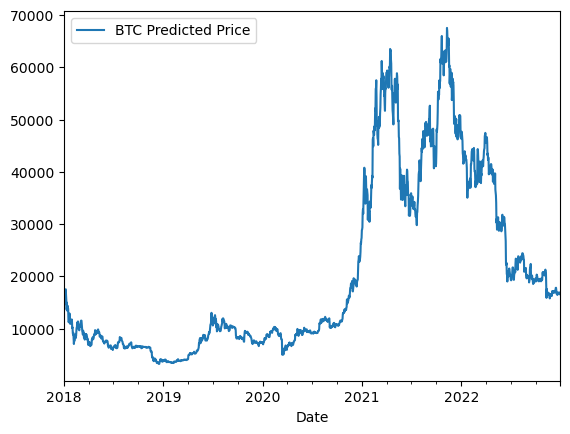

In [102]:
btc_pred = crypto_btc.copy()
btc_pred['BTC Predicted Price'] = pred_btc
btc_pred.plot(
    x='Date',
    y='BTC Predicted Price')